In [2]:
# Here are some necessary packages that we need to import to run this notebook. Run this code first!!

import numpy as np
import matplotlib.pyplot as plt

# Histograms as a tool for data visualization



In this notebook, we'll learn how *histograms* can be used as a tool to visualize large datasets. 



## What does a histogram represent?

Virtually all data collection in physics boils down to writing numbers that represent some sort of measurement. We then want to convert the collection of numbers (the *dataset*) into a representation that is easily analyzable. This generally involves converting the numbers into a *plot*.

One type of plot is a *histogram*. Histograms are most useful when we have a large number of measurements of the same quantity that were taken under the same conditions. As an example, consider this histogram produced by the ATLAS experiment at the Large Hadron Collider at CERN in 2012.


This specific analysis focused on proton-proton collisions that resulted in four leptons (an example of a lepton is an electron). 

<p><a href="https://arxiv.org/abs/1207.7214">
<img src="https://drive.google.com/uc?export=view&id=1wk-gGEjCSSdSUxadtjbVrSbZ1zAO6Zhh" alt="drawing" width="400"/>
</a></p>



In the above histogram, the x-axis represents all the potential masses that the mother particle could have had (in this case, the experiment is considering masses ranging from 80 to 250 GeV). Note that the x-axis is divided into sections of width 10 GeV. The y-axis shows the number of observations made for a candidate mother particle within each 10 GeV-wide mass section. 

Note that the ATLAS experiment found a bump at $m_{4l}$ = 125 GeV, which indicates the existence of a mystery particle...(maybe you have heard of it before?)

## Moving from datasets to histograms

Let's try to create our own histogram from a dataset of raw numbers. Consider the following scenerio:

You are gifted a sample of Uranium-241 for your birthday. You want to see if you can pick up radioactive emissions from the sample, so you grab your trusty Geiger counter and place it near the uranium.

Every minute, you record the number of "clicks" that the Geiger counter makes. You store the data in text file ```geiger_counts_A.txt```, separating each measurement with a comma.

**Activity:** Write a function to read in the dataset into a ```np.array``` of numbers, ```num_clicks_per_minute```. Print out the first 12 values of the dataset.

In [3]:
 
#Reads in data from a data file and returns it as a list - finish this definition
def read_in_dataset(file_loc):
  num_clicks_per_minute =  np.genfromtxt(file_loc, dtype = int, delimiter=",")  
  for click in num_clicks_per_minute[0:12]:
         print (click)
   # Your code here to print out the first 12 elements of num_clicks_per_minute
  return num_clicks_per_minute


#main code - you don't need to modify this
dataset_location = "datasets/geiger_counts_A.txt"
num_clicks = read_in_dataset(dataset_location)

11
11
5
15
15
17
16
6
10
12
16
14


It's very hard to gain any meaning from this list of numbers. So let's make this data into a histogram.

First, we need to define how we're going to divide the dataset into intervals, or *bins*. Each histogram bin is defined by two numbers, a *left edge* and a *right edge*. Note that histogram bin edges never overlap each other, so there should be no ambiguity about where a given data point is binned. 

Histogram bins represent the set of all the possible values that we could see in our dataset. *Binning* a dataset means that we assign each measurement to a given bin if it falls between the two edge values. This means that we could quickly see, for example, how many times we counted 1 click per minute, or 2 clicks, and so on.

So a histogram can be seen as a quick way to count the number of times that a measurement falls in a given bin.

Here is an example of how we use ```plt.hist()``` to create a histogram. Don't forget to label your axes!

Text(0.5, 1.0, 'Number of clicks per minute')

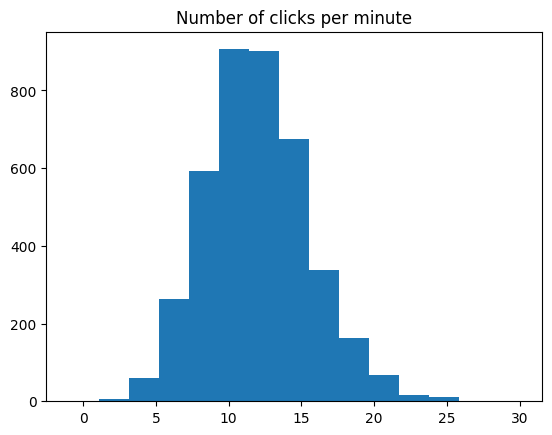

In [4]:

plt.hist(num_clicks, bins = 15)
plt.title('Number of clicks per minute')

## Interpreting histograms as probability distributions

We said earlier that histograms can be interpreted as probability distributions for a given observable. Here's how we can see that. 

The total number of observations $N$ in the dataset can be found by summing the number of values in each bin, over all bins. i.e. 

$$N = \sum_i n_i.$$

Here, we have introduced $i$ as an index over histogram bins $b_i$. 

Then the probability of an arbitrary observation belonging to the bin $b_i$ is

$$p_i = \frac{n_i}{N}.$$

If bin $b_i$ has a left edge value $l_i$ and a bin width $\delta$, then $p_i$ is the probability that a given observable lies in the interval $[l_i, l_i + \delta]$. But this is exactly the definition for the proability distribution for the observable! 

---


Text(0.5, 1.0, 'Probability - clicks per minute')

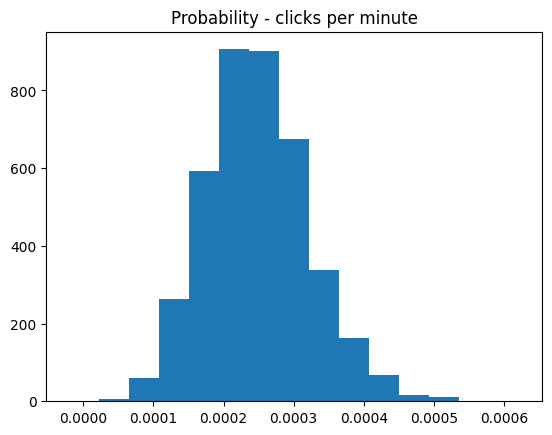

In [5]:
#run this chunk
prob_clicks = []
N = 0
for num in num_clicks:
    N += num
for num in num_clicks: 
    prob_clicks.append(num/N)
    
plt.hist(prob_clicks, bins = 15)
plt.title('Probability - clicks per minute')



**Activity**: Plot the following heights data from a survey of male college students. Use 16 bins. Using more bins might make the cut-offs go in between the inches and you will end up with empty bins (because people round their heights to the nearest inch). 

Text(0.5, 1.0, 'heights')

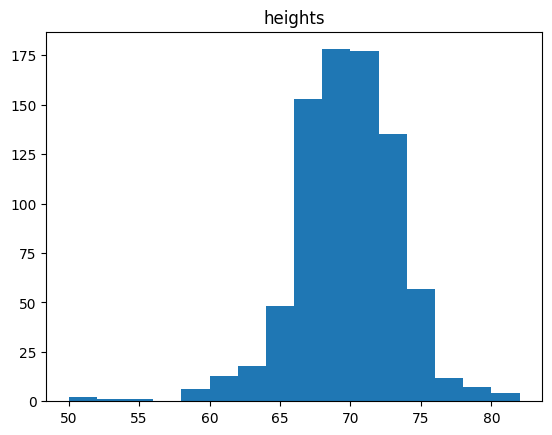

In [6]:
dataset_location_2 = "datasets/heights_data.csv"
def read_in_dataset(file_loc): #skip_header = 1 in np.genfromtxt
      nex=np.genfromtxt(file_loc, dtype = int, delimiter=",", skip_header = 1)
      return nex
heights=read_in_dataset(dataset_location_2)
plt.hist(heights, bins=16)
plt.title("heights")


#put main code here to call read_in_dataset and create the histogram.
#make appropriate title
 

Determine the standard deviation and mean of the heights. You can use the built-in numpy functions mean() and std().


Do a plausibility check:  
Given that they are in inches, is your answer realistic? Check by converting to feet (12 inches = 1 foot), or if you prefer metric, 1 inch = 2.54 cm. 

In [7]:
mu = np.mean(heights)    #Normal distributions use the variable mu for the mean
sigma=np.std(heights)

Challenge: write code that will print the average in the way that we talk about feet and inches. "I'm 5 feet, 8 inches." I used floor-division and int() to do this. The output should look like this:
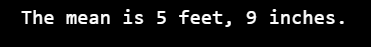



In [8]:
#this challenge is extra credit. Your code goes here (or skip to next activity)


*Activity:*
Use the function   np.random.normal(mu,sigma,n) to generate a numpy array of numbers that have a normal distribution and the same
average (mu) and standard deviation (sigma) as the male heights data listed above. The first parameter is the average, the second parameter is the standard deviation, and the third parameter is the number of data points generated (use 500).  
Plot the data as a histogram with 16 bins (like your previous histogram has) and compare them visually to see how well the students' self-reported heights fall into a normal distribution. 

Run your simulation multiple times, because it is producing random data - it will come out slightly differently every time. 

Text(0.5, 1.0, 'histogram')

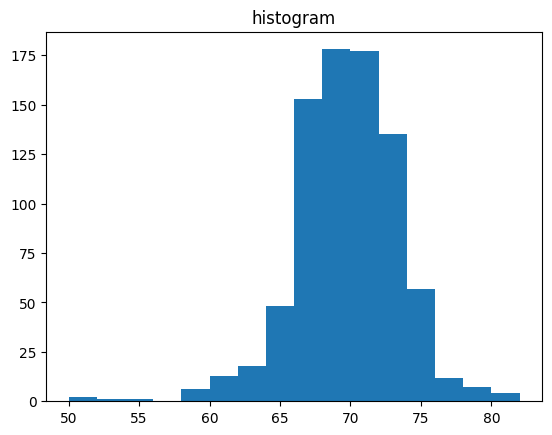

In [9]:
arr=np.random.normal(mu,sigma,500)
gram=plt.hist(heights, bins=16)
plt.title("histogram")
#your histogram goes here; include a title.


Calculate what percentage of the population in your simulated normal distribution fall below 1 standard deviation below the mean. 

Also calculate what percentage of the population are above 1 standard deviation above the mean. 

In [10]:
#Your code goes here
me=np.mean(heights)
sig=np.std(heights)
l=0
h=0
num_height=0
for h in heights:
    if(float(h)<(me-sig)):
        l+=1
    if(float(h)>(me+sig)):
        h+=1
    num_height+=1
print("below: ", (l/num_height)*100,"%")
print("above: ", (h/num_height)*100,"%")

below:  10.960591133004927 %
above:  8.12807881773399 %




It is a property of the normal distribution that 68% of the population should be within 1 standard deviation of the mean (with the rest of the population divided evenly above and below).

95% should fall within 2 standard deviations. (See image below; $\mu$ is the Greek letter mu, which stands for mean. $\sigma$ is the Greek letter sigma, which means standard deviation). 

 Is this the case for your data? Print the percentage that falls within 1 standard deviation and the percentage that falls within 2 standard deviations.
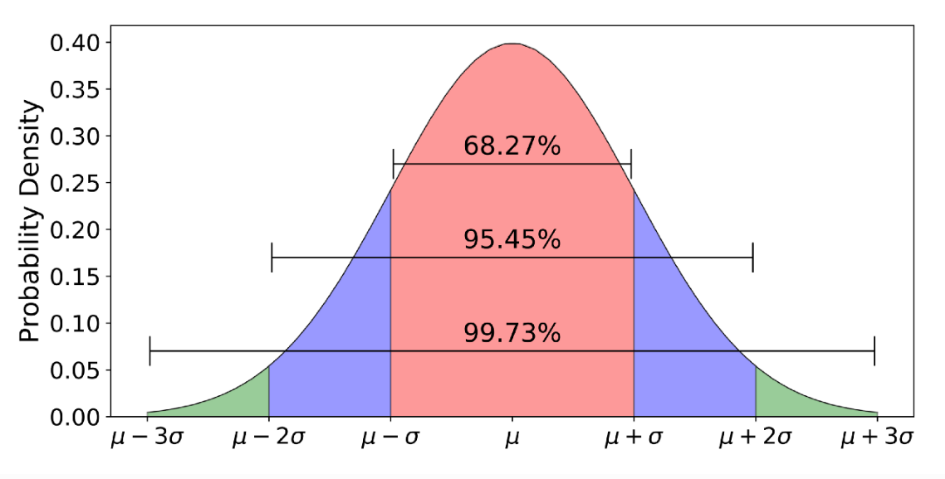

In [11]:
#Your code goes here
one_dev=0
two_dev=0
count=0
for h in heights:
    if(float(h)>(me-sig) and float(h)<(me+sig)):
        one_dev+=1
    if(float(h)>(me-(2*sig)) and float(h)<(me+(2*sig))):
        two_dev+=1
    count+=1
print("one deviation: ", (one_dev/count)*100,"%")
print("two deviation: ", (two_dev/count)*100,"%")

one deviation:  75.61576354679804 %
two deviation:  95.19704433497537 %


You may find that your numbers are close to the predicted values, but off by a few percent (like 71% falling within 1 standard deviation instead of 68%). What could you do differently when you simulate the data set (when you use np.random.normal) to better attain the theoretical proportions? 

(Hint: which should give better results, having a large amount of data or a small amount?)

If you are happy with your code, please turn in this assignment by pushing it to GitHub. It counts as homework due Thursday at 5pm. No credit will be awarded if pushed to github after Friday at midnight.